<head> 
    Um Signifikanz zu testen, wird der Tag mit den wenigsten Abständen im Einstiegsbereich gesucht. Die Anzahl der dort gefundenen Abstände wird als "min_d" gespeichert. Nun wird an einem anderen Tag ein zufälliges Sample von min_d Abständen genommen und geschaut, wie sehr sich das Sample von der Grundgesamtheit unterscheidet.
    </head>

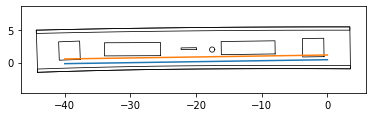

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import random
import matplotlib.pyplot as plt

Am 1.4 sind mit 496 die wenigsten Abstände verfügbar (innerhalb Einstiegsbereich). Nun wird ein Tag vor und ein Tag nach dem Lockdown ausgewählt: 5.2 und 26.8:

In [2]:
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "0205" in filename:
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        feb_d = get_all_distances(df)
    elif "0826" in filename:
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        aug_d = get_all_distances(df)

In [3]:
print(str(len(feb_d)) + " Abstände wurden am 5.2 gemessen")
print(str(len(aug_d)) + " Abstände wurden am 26.8 gemessen")

3428 Abstände wurden am 5.2 gemessen
3017 Abstände wurden am 26.8 gemessen


In [4]:
min_d = 496
whole_sample_feb = []
whole_sample_aug = []
real_mean_feb = statistics.mean(feb_d)
real_mean_aug = statistics.mean(aug_d)
ranges = []
for i in range(100):
    ranges.append(i)
    sample_feb = random.sample(feb_d, min_d)
    sample_mean_feb = statistics.mean(sample_feb)
    whole_sample_feb.append(sample_mean_feb)
    sample_aug = random.sample(aug_d, min_d)
    sample_mean_aug = statistics.mean(sample_aug)
    whole_sample_aug.append(sample_mean_aug)

In [5]:
import matplotlib as mlp
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

*** Von 100 Stichproben liegen 98 der Stichprobenmittelwerte innerhalb von 95% bis 105% des Mittelwerts der Grundgesamtheit


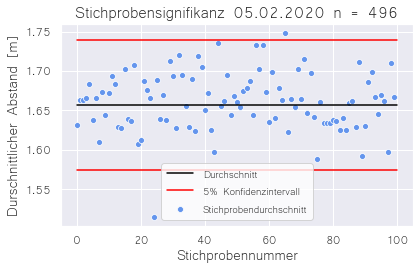

In [6]:
signifikanz = len([i for i in whole_sample_feb if i < 1.05*(real_mean_feb) and i > 0.95*(real_mean_feb)])
print("*** Von 100 Stichproben liegen {0} der Stichprobenmittelwerte innerhalb von 95% bis 105% des Mittelwerts der Grundgesamtheit".format(signifikanz))
sb.set()
sb.scatterplot(ranges, whole_sample_feb, color = "cornflowerblue", label = "Stichprobendurchschnitt")
plt.plot([0,100], [real_mean_feb, real_mean_feb], color = "black", label = "Durchschnitt")
plt.plot([0,100], [0.95*(real_mean_feb), 0.95*(real_mean_feb)], color = "red", label = "5% Konfidenzintervall")
plt.plot([0,100], [1.05*(real_mean_feb), 1.05*(real_mean_feb)], color = "red")
plt.xlabel("Stichprobennummer", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.xticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':13})
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.title("Stichprobensignifikanz 05.02.2020 n = 496", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.savefig(r"Signifikanztest\Stichprobensignifikanz 0502", dpi = 200)

*** Von 100 Stichproben liegen 98 der Stichprobenmittelwerte innerhalb von 95% bis 105% des Mittelwerts der Grundgesamtheit


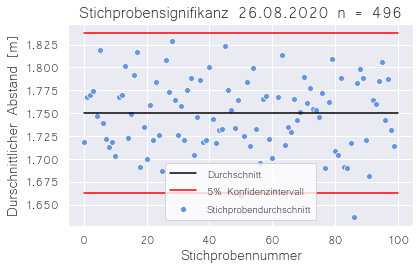

In [7]:
signifikanz = len([i for i in whole_sample_aug if i < 1.05*(real_mean_aug) and i > 0.95*(real_mean_aug)])
print("*** Von 100 Stichproben liegen {0} der Stichprobenmittelwerte innerhalb von 95% bis 105% des Mittelwerts der Grundgesamtheit".format(signifikanz))
sb.set()
sb.scatterplot(ranges, whole_sample_aug, color = "cornflowerblue", label = "Stichprobendurchschnitt")
plt.plot([0,100], [real_mean_aug, real_mean_aug], color = "black", label = "Durchschnitt")
plt.plot([0,100], [0.95*(real_mean_aug), 0.95*(real_mean_aug)], color = "red", label = "5% Konfidenzintervall")
plt.plot([0,100], [1.05*(real_mean_aug), 1.05*(real_mean_aug)], color = "red")
plt.xlabel("Stichprobennummer", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.xticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':13})
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.title("Stichprobensignifikanz 26.08.2020 n = 496", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.savefig(r"Signifikanztest\Stichprobensignifikanz 2608", dpi = 200)